In [51]:
import random
import json
import requests
import pandas as pd
import configparser
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint
config = configparser.ConfigParser()
config.read('../../../API_keys/config.py')
api_key = config['DEFAULT']['api_key']
from citipy import citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
you can call random numbers 90, 180
to generate the list of ipynb
y


SyntaxError: invalid syntax (<ipython-input-3-776bb9aec7bb>, line 1)

In [8]:
x = random.random()
print("Random float number is ", x)
print("Random float number is ", random.random())

Random float number is  0.36454807883332907
Random float number is  0.20775643704158042


In [23]:
random.randrange(-180,180, 2)

14

In [22]:
list_of_cities = []
for i in range(0,1300):
    x = random.randrange(-90,90,2)
    y = random.randrange(-180,180, 2) 
    x = x + random.random()
    y = y + random.random()
   # print(x,y)
    city = citipy.nearest_city(x,y)
    list_of_cities.append(city.city_name)

In [23]:
try_df = pd.DataFrame(list_of_cities)

In [24]:
try_df[0].value_counts()

rikitea         46
ushuaia         39
mataura         27
punta arenas    24
busselton       24
                ..
paracuru         1
zyryanka         1
tidore           1
deshna           1
silvan           1
Name: 0, Length: 545, dtype: int64

## Generate Cities List

In [25]:
new_df = pd.DataFrame(try_df[0].unique())

In [26]:
new_df

,0
0,chokurdakh
1,nikolskoye
2,bluff
3,punta arenas
4,faya
...,...
540,buta
541,concordia
542,preili
543,atambua


In [27]:
len(new_df)

545

In [76]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url
# print(response['clouds']['all'])
# pprint(response)

'http://api.openweathermap.org/data/2.5/weather?appid=201c28e77ed12306e4f20f08db82aa7a&units=imperial&q='

In [48]:
print(response['dt'])


1601473202


response['main']['temp']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
test_cities = ["San Francisco", "Berlin", "London", "Hot Dogs", "Santa Cruz"]
#test_cities = ["San Francisco"]
test_cities_df = pd.DataFrame(test_cities)

In [79]:
test_cities_df
for index, row in test_cities_df.iterrows():
    print(row[0])

San Francisco
Berlin
London
Hot Dogs
Santa Cruz


In [85]:
new_df
new_df[0].value_counts
#both have 558

,0
0,tura
1,sao borja
2,dikson
3,savonlinna
4,kama
...,...
553,tomatlan
554,figeac
555,erzin
556,paamiut


In [28]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
print('Beginning Data Retrieval')
print('------------------------------------')

lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country =[]
date = []
city = []
# for index, row in test_df.iterrows():
#     print(row[0])
#     response = requests.get(query_url + row[0]).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

for index, row in new_df.iterrows(): 
    query_url = url+ "appid=" + api_key + "&units=" + units + "&q=" + str(row[0])
    response = requests.get(query_url).json()
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city.append(row[0])
        print(f'{row[0]} found, processing record {index}') 
    except:
        print('City Not found... skipping')
        pass

Beginning Data Retrieval
------------------------------------
chokurdakh found, processing record 0
nikolskoye found, processing record 1
bluff found, processing record 2
punta arenas found, processing record 3
faya found, processing record 4
cefalu found, processing record 5
trelew found, processing record 6
victoria found, processing record 7
ponta do sol found, processing record 8
sarh found, processing record 9
tiksi found, processing record 10
bilma found, processing record 11
kaitangata found, processing record 12
asosa found, processing record 13
tres passos found, processing record 14
tilichiki found, processing record 15
kruisfontein found, processing record 16
muroto found, processing record 17
iqaluit found, processing record 18
bubaque found, processing record 19
thompson found, processing record 20
City Not found... skipping
dawson creek found, processing record 22
jamestown found, processing record 23
demba found, processing record 24
hofn found, processing record 25
espe

urumqi found, processing record 222
northam found, processing record 223
broome found, processing record 224
City Not found... skipping
srednekolymsk found, processing record 226
peniche found, processing record 227
sovetskaya gavan found, processing record 228
bredasdorp found, processing record 229
sobolevo found, processing record 230
lorengau found, processing record 231
port elizabeth found, processing record 232
oussouye found, processing record 233
leningradskiy found, processing record 234
satao found, processing record 235
hualmay found, processing record 236
san carlos de bariloche found, processing record 237
kotelnich found, processing record 238
kapaa found, processing record 239
conde found, processing record 240
luderitz found, processing record 241
lebu found, processing record 242
vila found, processing record 243
nemuro found, processing record 244
karratha found, processing record 245
meulaboh found, processing record 246
buchanan found, processing record 247
ternate

monrovia found, processing record 440
shouguang found, processing record 441
City Not found... skipping
City Not found... skipping
lardos found, processing record 444
huanren found, processing record 445
plainview found, processing record 446
City Not found... skipping
labuhan found, processing record 448
City Not found... skipping
srandakan found, processing record 450
chivilcoy found, processing record 451
marystown found, processing record 452
ukiah found, processing record 453
xining found, processing record 454
kedrovyy found, processing record 455
vrangel found, processing record 456
sarakhs found, processing record 457
mahanoro found, processing record 458
salamiyah found, processing record 459
pereslavl-zalesskiy found, processing record 460
ardakan found, processing record 461
port hedland found, processing record 462
constitucion found, processing record 463
krasnoselkup found, processing record 464
camalu found, processing record 465
segamat found, processing record 466
holo

In [29]:
print(len(city))
print(len(lat))
print(len(long))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

499
499
499
499
499
499
499
499
499


In [118]:
data = {"City":city,"Lat":lat,"Lng":long}

In [30]:
data = {"City":city,"Lat":lat,"Lng":long,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
        "Wind Speed":windspeed,"Country":country,"Date":date}

In [107]:
data

{'City': ['tura',
  'sao borja',
  'dikson',
  'savonlinna',
  'kama',
  'hermanus',
  'orlik',
  'cabo san lucas',
  'grindavik',
  'evensk',
  'avarua',
  'mana',
  'neepawa',
  'ushuaia',
  'kapaa',
  'oyama',
  'puerto ayora',
  'atlantic city',
  'busselton',
  'nome',
  'caraguatatuba',
  'georgetown',
  'buzdyak',
  'athabasca',
  'arraial do cabo',
  'albany',
  'gigmoto',
  'new norfolk',
  'portobelo',
  'bethel',
  'cap malheureux',
  'atuona',
  'qaanaaq',
  'dingle',
  'jamestown',
  'vaini',
  'cherskiy',
  'punta arenas',
  'saint-philippe',
  'kodiak',
  'krasnoselkup',
  'khatanga',
  'aksarka',
  'ribeira grande',
  'bengkulu',
  'mao',
  'kavaratti',
  'kasongo-lunda',
  'hilo',
  'mahebourg',
  'rikitea',
  'dalbandin',
  'balabac',
  'upernavik',
  'emerald',
  'saint-leu',
  'mataura',
  'langham',
  'husavik',
  'karratha',
  'purpe',
  'bredy',
  'coihaique',
  'cape town',
  'korla',
  'talnakh',
  'hobart',
  'sabang',
  'ilulissat',
  'shitkino',
  'angoche',

In [87]:
len(lat)

511

NameError: name 'cities_info_df' is not defined

In [36]:
cities_info_df = pd.DataFrame(data)
cities_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.63,147.92,34.95,96,38,14.94,RU,1601488077
1,nikolskoye,59.70,30.79,55.40,82,20,6.71,RU,1601488077
2,bluff,-46.60,168.33,37.99,94,61,3.00,NZ,1601488077
3,punta arenas,-53.15,-70.92,37.40,59,75,35.57,CL,1601487894
4,faya,18.39,42.45,69.80,64,14,5.82,SA,1601488078
...,...,...,...,...,...,...,...,...,...
494,buta,2.79,24.73,71.64,96,94,2.21,CD,1601488214
495,concordia,-31.39,-58.02,84.00,50,48,10.00,AR,1601488268
496,preili,56.29,26.72,53.15,84,85,7.65,LV,1601488269
497,atambua,-9.11,124.89,72.32,79,21,2.86,ID,1601488269


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [122]:
cities_info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,511.000000,511.000000,511.000000,511.00000,511.000000,511.000000,5.110000e+02
mean,20.787671,15.928748,64.505382,70.44227,50.048924,8.611370,1.601483e+09
std,34.702387,91.343090,18.537221,20.80102,36.655625,6.158711,8.641042e+01
min,-54.800000,-179.170000,14.340000,1.00000,0.000000,0.180000,1.601483e+09
25%,-8.300000,-63.575000,51.160000,59.00000,14.000000,3.870000,1.601483e+09
50%,24.700000,21.550000,66.990000,75.00000,47.000000,6.930000,1.601483e+09
75%,52.115000,93.875000,79.040000,85.00000,85.500000,11.420000,1.601483e+09
max,78.220000,178.420000,107.550000,100.00000,100.000000,35.570000,1.601483e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [125]:
cities_info_df.loc[cities_info_df["Humidity"]>100]
#  Get the indices of cities that have humidity over 100%.
# No cities with humidity over 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [40]:
cities_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        499 non-null    object 
 1   Lat         499 non-null    float64
 2   Lng         499 non-null    float64
 3   Max Temp    499 non-null    float64
 4   Humidity    499 non-null    int64  
 5   Cloudiness  499 non-null    int64  
 6   Wind Speed  499 non-null    float64
 7   Country     499 non-null    object 
 8   Date        499 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 35.2+ KB


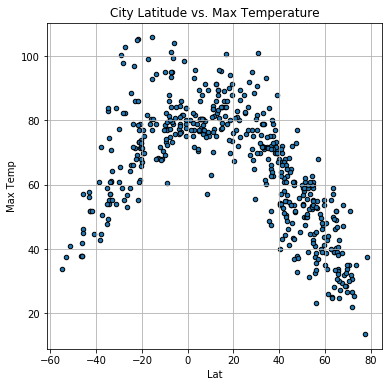

In [45]:
cities_info_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,6), edgecolors="black",
                    title="City Latitude vs. Max Temperature 9/30/20")

## Latitude vs. Humidity Plot

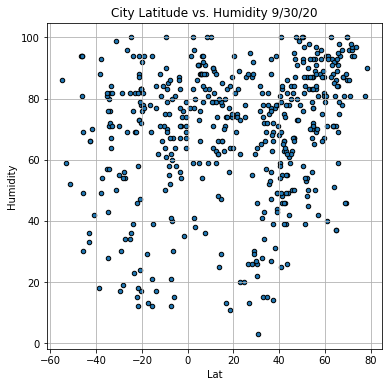

In [46]:
cities_info_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,6), edgecolors="black",
                    title="City Latitude vs. Humidity 9/30/20")

## Latitude vs. Cloudiness Plot

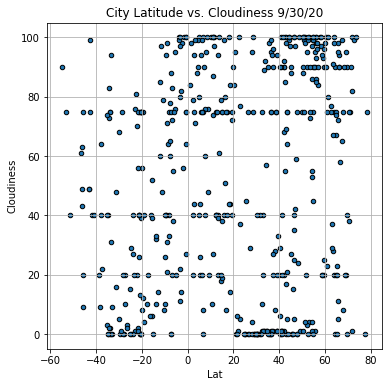

In [47]:
cities_info_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,6), edgecolors="black",
                    title="City Latitude vs. Cloudiness 9/30/20")

## Latitude vs. Wind Speed Plot

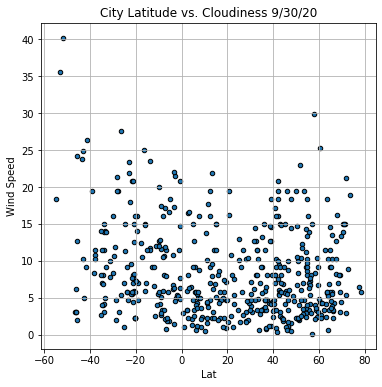

In [48]:
cities_info_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,6), edgecolors="black",
                    title="City Latitude vs. Cloudiness 9/30/20")

## Linear Regression

In [ ]:
cities_info_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,6), edgecolors="black",
                    title="City Latitude vs. Max Temperature 9/30/20")



In [24]:
a

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
cities_info_df

The r-squared is :0.23986723246747882


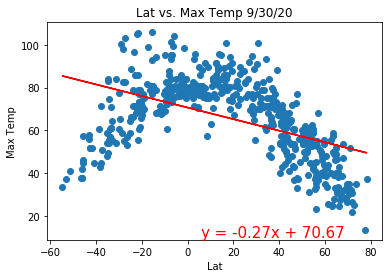

In [53]:
# Add the linear regression equation and line to plot
x_values = cities_info_df.loc["Lat"]
y_values = cities_info_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Lat vs. Max Temp 9/30/20')
print(f"The r-squared is :{rvalue**2}")
plt.show()

The r-value is: 0.46937863826630627


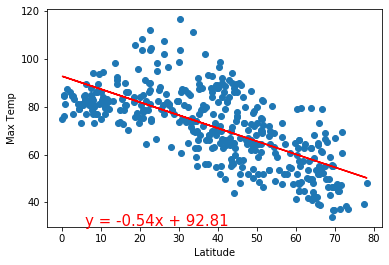

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


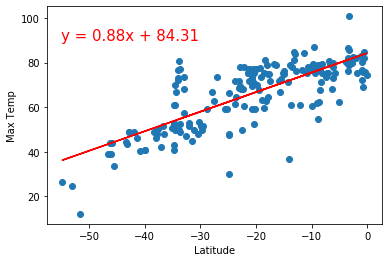

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


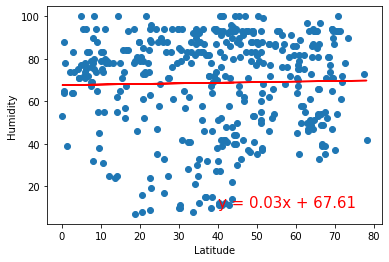

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


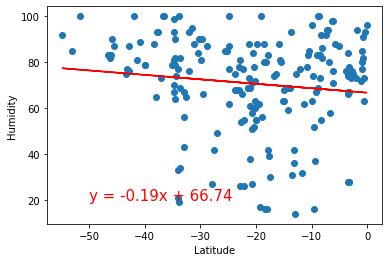

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


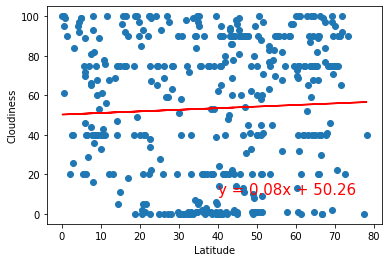

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


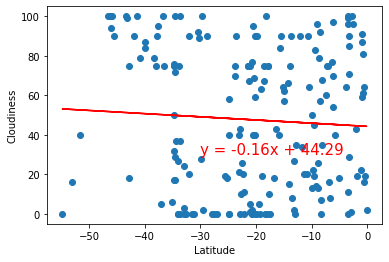

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


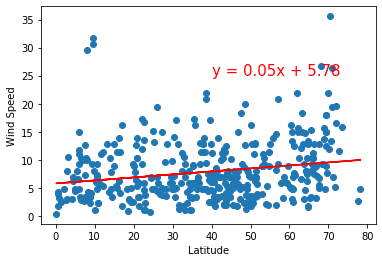

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


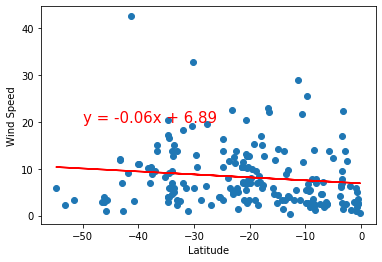